In [1]:
import pandas
from datetime import datetime
from pytz import utc 
import matplotlib.pyplot as plt
data = pandas.read_csv('reviews.csv', parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### Rating average/count by day

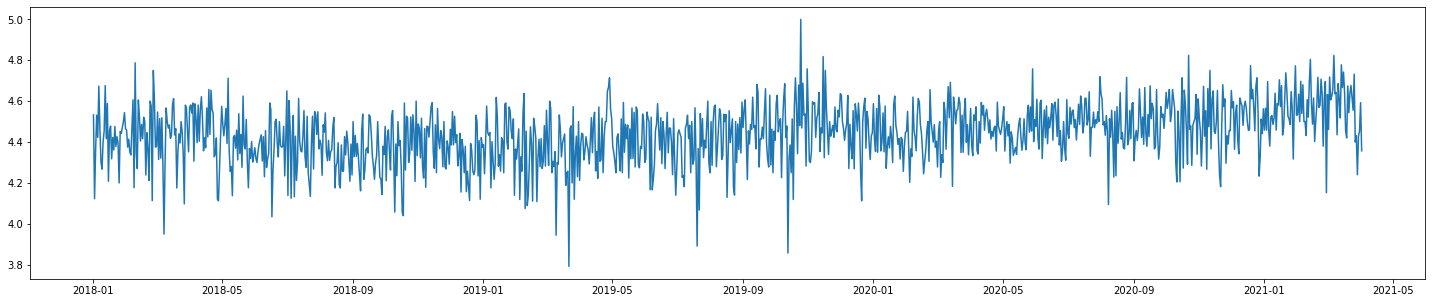

In [13]:
data['Day'] = data['Timestamp'].dt.date
data_average = data.groupby(['Day']).mean()
plt.figure(figsize=(25,5))
plt.plot(data_average.index,data_average['Rating'])

In [15]:
data_average = data.groupby(['Day']).count()
data_average

,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15
...,...,...,...,...
2021-03-29,25,25,25,1
2021-03-30,35,35,35,1
2021-03-31,32,32,32,3


### Rating average by week

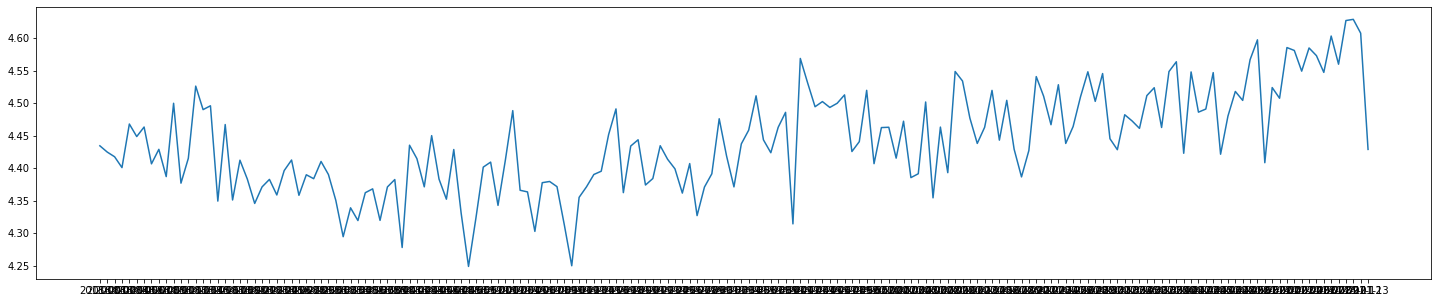

In [4]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week']).mean()
plt.figure(figsize=(25,5))
plt.plot(week_average.index,week_average['Rating'])

### Rating average by month

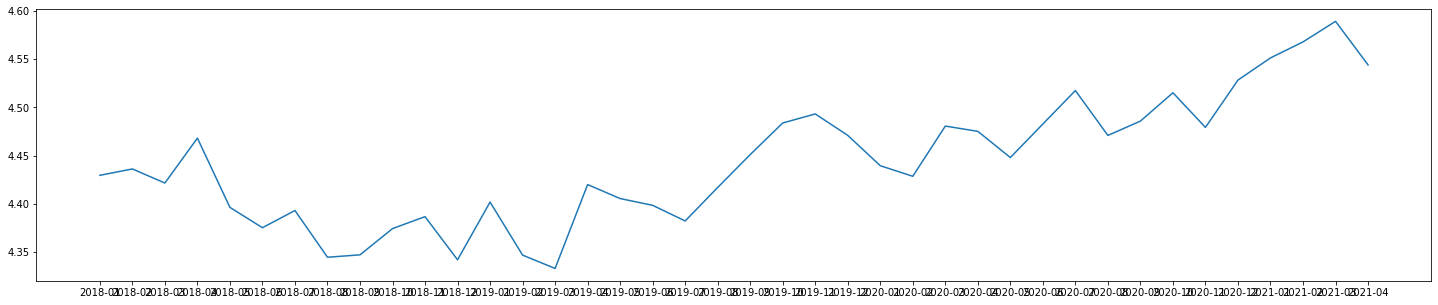

In [10]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).mean()
plt.figure(figsize=(25,5))
plt.plot(month_average.index,month_average['Rating'])

### Rating average by month by course

<AxesSubplot:xlabel='Month'>

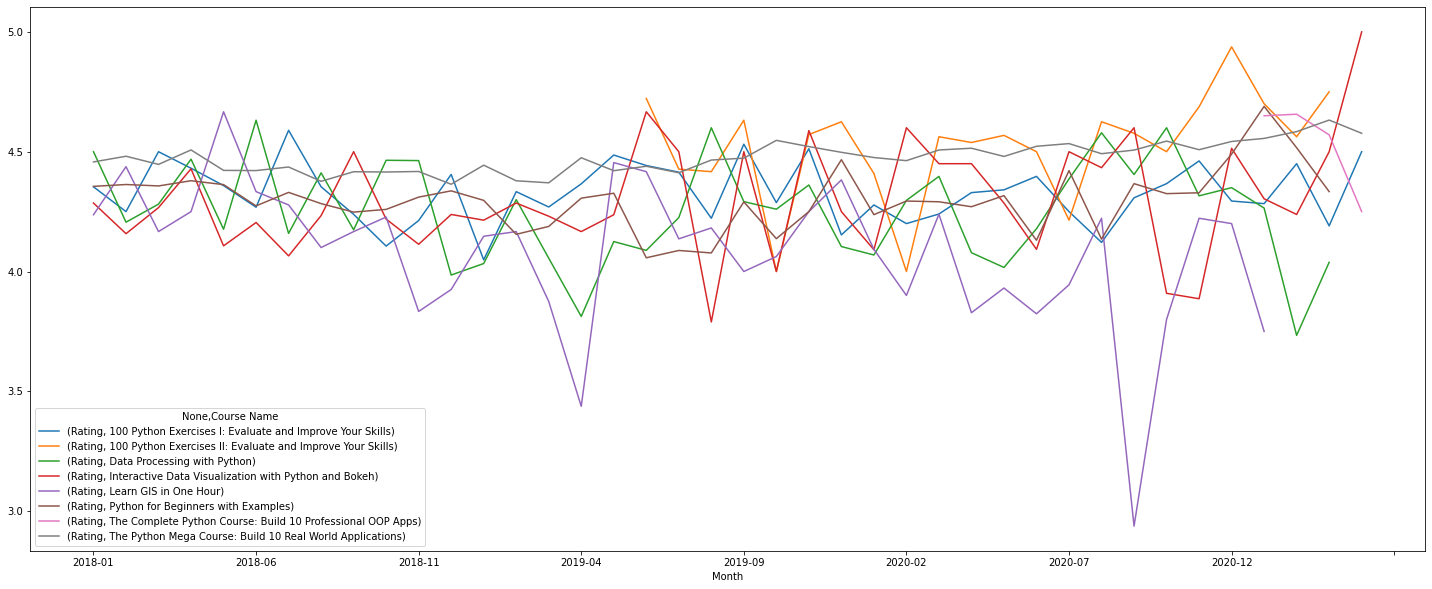

In [16]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month', 'Course Name']).mean().unstack()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Date'] = pd.Categorical(df['Date'], categories=cats, ordered=True)
month_average.plot(figsize=(25,10))

<AxesSubplot:xlabel='Weekday'>

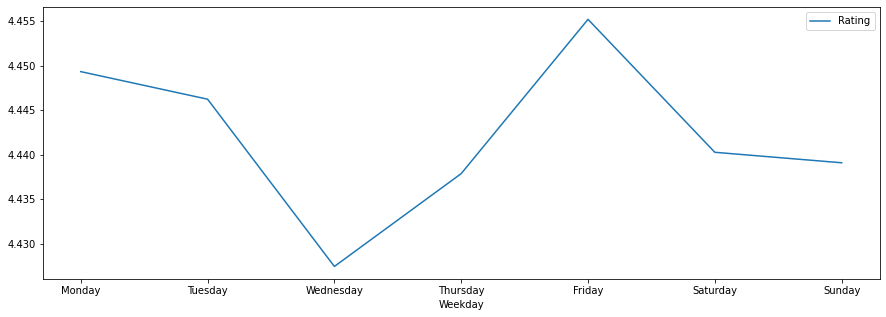

In [62]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
weekday_average = data.groupby(['Weekday']).mean().reindex(cats) 
weekday_average.plot(figsize=(15,5))

### Number ratings by course

([<matplotlib.patches.Wedge at 0x7f5b313bb880>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609823, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015484, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

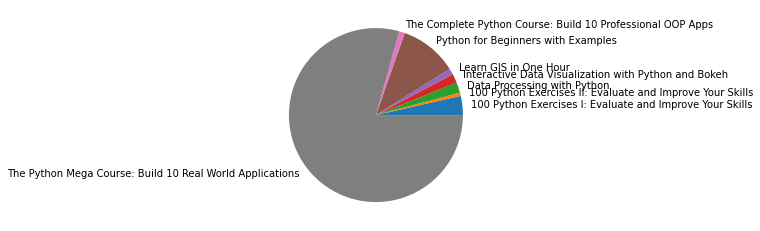

In [63]:
share = data.groupby(['Course Name'])['Rating'].count()
plt.pie(share, labels=share.index)

In [64]:
share.index

Index(['100 Python Exercises I: Evaluate and Improve Your Skills',
       '100 Python Exercises II: Evaluate and Improve Your Skills',
       'Data Processing with Python',
       'Interactive Data Visualization with Python and Bokeh',
       'Learn GIS in One Hour', 'Python for Beginners with Examples',
       'The Complete Python Course: Build 10 Professional OOP Apps',
       'The Python Mega Course: Build 10 Real World Applications'],
      dtype='object', name='Course Name')